# Tarea 1: Visión Computacional

ME4707 - Robótica - Semestre 2021-2

Profesor: Juan C. Zagal - Auxiliar: Raimundo Lorca - Laboratorios: Gaspar Fábrega

# Instalación
## 1. Google Colab
En esta tarea, que se trabajará durante los primeros cuatro laboratorios computacionales, se utilizará Python 3 y la librería de visión computacional OpenCV. La forma más fácil de tener un ambiente de desarrollo de Python con todas las bibliotecas más comunes es utilizar **Google Colaboratory**. Colaboratory es un entorno Jupyter notebook gratuito que se ejecuta completamente en la nube. Puede escribir y ejecutar código, y solo requiere de una cuenta google.

https://colab.research.google.com/notebooks/welcome.ipynb

Debe trabajar sobre este mismo archivo .ipynb completando lo que se solicita en cada problema.

## 2. OpenCV
En esta tarea se utilizará principalmente **OpenCV**. La Open Surce Computer Vision es una librería especializada en herramientas de visión computacional y en todo lo que respecta a visión artificial en general. De este modo provee de funcionalidades de todo tipo de complejidad, desde operaciones básicas de procesamiento de imágenes, hasta algoritmos de reconocimiento de objetos.

<img src="https://raw.githubusercontent.com/cherrerab/roboticafcfm/master/auxiliar_01/bin/opencv_logo.png" height="200">

Por supuesto, esta librería cuenta con su documentación correspondiente. En esta puede encontrar descripciones más detalladas de sus funcionalidades, así como también ejemplos, tutoriales y otros.

https://docs.opencv.org/master/


##3. Imágenes

Para facilitar la carga de los archivos necesarios para completar la tarea, se ha habilitado un directorio en el github del curso `roboticafcfm`. Para clonar el repositorio en el entorno de Colab solo debe ejecutar el siguiente bloque de código.

In [3]:
!git clone https://github.com/RaimundoLorca/roboticafcfm2021-2.git
%cd roboticafcfm2021-2

C:\Users\joaqu\Documents\ME4707 Robótica\roboticafcfm2021-2


# Problema 1: Image Masking
Como se ha visto en las clases del curso, las imágenes digitales consisten en arreglos discretos de valores numéricos, donde cada valor define la intensidad de iluminación que posee un punto `pixel` específico en la imagen.

Por ejemplo, cargue la imagen `shapes.png` e imprima las dimensiones de esta. Esto lo puede hacer mediante el siguiente código:

In [5]:
# El módulo matplotlib.plt nos permite visualizar las imágenes
# El módulo numpy contiene herramientas para arreglos numéricos
from matplotlib import pyplot as plt
import numpy as np
import cv2

# Para leer una imagen, hay que ingresar su ubicación en la función cv2.imread
img = cv2.imread('tarea_01//shapes.png')

# Las dimensiones de la imagen pueden ser obtenidas utilizando el atributo .shape
print('La imagen shapes.png tiene dimensiones: ', img.shape )

La imagen shapes.png tiene dimensiones:  (720, 720, 3)


Se puede notar que la imagen es un arreglo o bien, matriz de tres dimensiones `720x720x3`. En este caso, el primer valor corresponde a la altura `height` de la imagen, el segundo al ancho `width` de esta, y el último a la cantidad de canales que posee. Así, se trata de una imagen de 720x720 de 3 canales RGB.

Ahora, al cargar imágenes utilizando cv2.imread estas son cargadas como BGR y no RGB, por lo que los canales están inicialmente "mal asignados", por lo que deberán ser cambiados para poder visualizar las imagenes de manera correcta si queremos utilizar *matplotlib*. Para corregir esto existe la función `cv2.cvtColor` con la cual es posible cambiar el colorspace de la imagen.

<img src="https://raw.githubusercontent.com/gasparzilla/roboticafcfm/master/tarea_01/images/imagenes_P1/BGRtoRGB.png" height="250">

(-0.5, 719.5, 719.5, -0.5)

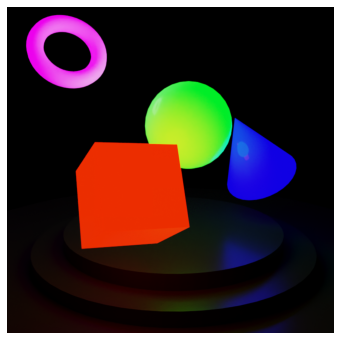

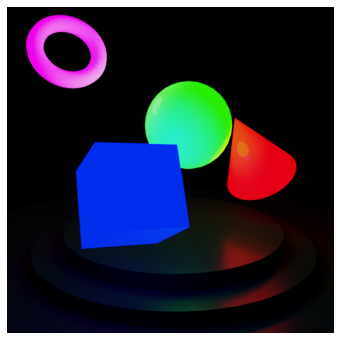

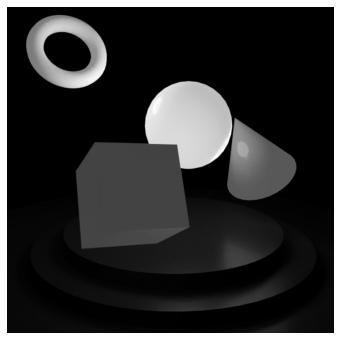

In [6]:
# leer imagen
img = cv2.imread('tarea_01//shapes.png')

# mostrar imagen en BGR
fig = plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')

# corregir a RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# mostrar imagen en RGB (correcta)
fig = plt.figure(figsize=(6, 6))
plt.imshow(img_rgb)
plt.axis('off')

# también se puede convertir a escala de grises
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
fig = plt.figure(figsize=(6, 6))
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

Como se puede ver, la imagen consiste principalmente cuatro objetos brillantes de distintos colores. No obstante, existe un poco de contenido adicional que no parece muy relevante y que podría ser removido (reflexiones en el suelo). Así, se podría procesar la imagen de tal manera de aislar las figuras tal como se muestra en la siguiente imagen:

<img src="https://raw.githubusercontent.com/gasparzilla/roboticafcfm/master/tarea_01/images/imagenes_P1/P1A1.png" height="250">

Para lograr lo anterior se puede generar una máscara `mask` a partir de una imagen binarizada y multiplicar esta con la imagen original.

En términos simples, una `mask` no es más que que un arreglo binario que describe las zonas de interés de una imagen, y por tanto, permite realizar segmentaciones como la mostrada a continuación.

<img src="https://raw.githubusercontent.com/gasparzilla/roboticafcfm/master/tarea_01/images/imagenes_P1/P1A2.png" height="250">

Una forma de binarizar una imagen es utilizando la función `cv2.inRange(img, umbral, 255)`, donde `umbral` indica el valor que define la segementación del resultado. También se puede utilizar la función `cv2.threshold` que podrá encontrar en la documentación.

(-0.5, 719.5, 719.5, -0.5)

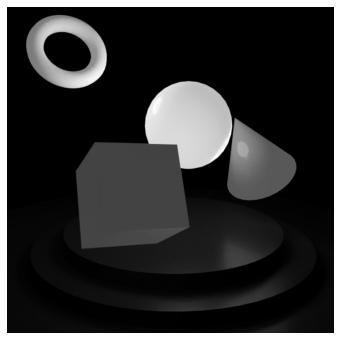

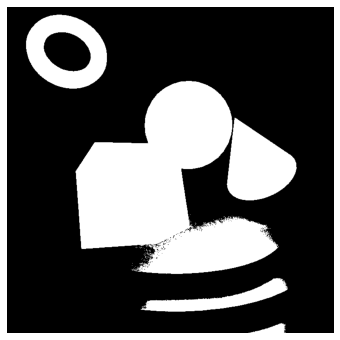

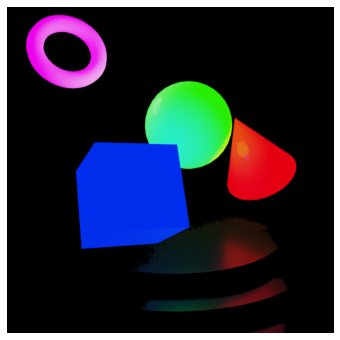

In [7]:
# ---
# leer imagen
img = cv2.imread('tarea_01//shapes.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# convertir a escala de grises
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

fig = plt.figure(figsize=(6, 6))
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

# ---
# binarizar con cv2.inRange
# **los valores de la máscara deben estar entre 0 y 1
mask = cv2.inRange(img_gray, 20, 255)
mask = mask/255

fig = plt.figure(figsize=(6, 6))
plt.imshow(mask, cmap='gray')
plt.axis('off')

# ---
# multiplicar máscara con imagen original

# inicializar nueva imagen img_mask
img_mask = np.zeros_like(img)

# para cada uno de los canales en img
for c in range(3):
    img_mask[:,:,c] = np.multiply(img[:,:,c], mask)

fig = plt.figure(figsize=(6, 6))
plt.imshow(img_mask)
plt.axis('off')


En el ejemplo anterior no se lograron aislar por completo las figuras luminosas debido a que el umbral seleccionado en la binarización no es el adecuado. Un método para determinar este umbral es analizando el histograma de la imagen.

Los histogramas de una imagen, corresponden a la representación gráfica de la distribución de las intensidades al interior de la imagen. Estos pueden ser generados utilizando la función `plt.hist(array, bins)`, donde el parámetro `array` consiste en el `np.array` a procesar, mientras que `bins` determina la discretización del histograma.

(a) Convierta la imagen a escala de grises y visualice su histograma (cree una nueva figura para esto y utilice la función `plt.hist` sobre `img.flatten()`). A partir del histograma, determine el umbral adecuado para la máscara y genere la imagen con los objetos aisladas.

(-0.5, 719.5, 719.5, -0.5)

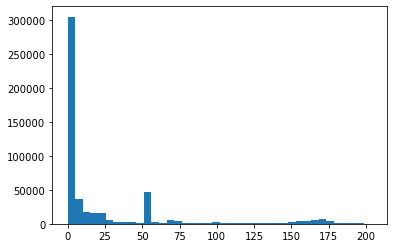

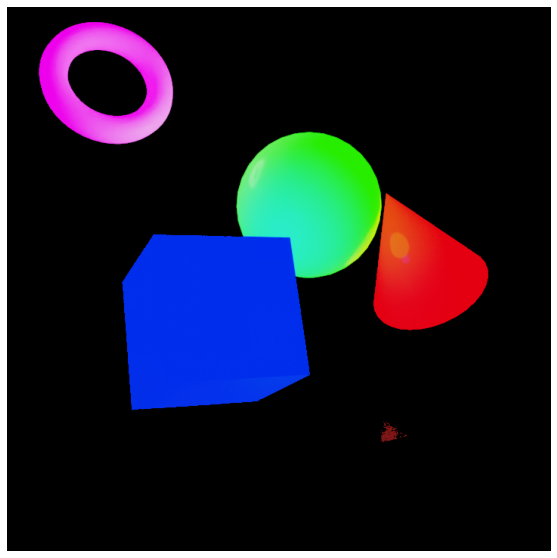

In [8]:
# RESPUESTA PROBLEMA 1.a

# 1. leer la imagen (RGB)
img = cv2.imread('tarea_01//shapes.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 2. convertir a escala de grises
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# 3. plotear histograma de la imagen en escala de grises
hist = img_gray.flatten() 
#hist = img.flatten() #el enunciado dice usar img.flatten()
plt.figure()
plt.hist(hist,40)

# 4. crear máscara binaria a partir del umbral del histograma
mask = cv2.inRange(img_gray, 53 , 255)/255

# 5. multiplicar imagen original con máscara y visualizar
img_mask = np.zeros_like(img)

for k in range(img_mask.shape[2]):
    img_mask[:,:,k] = np.multiply(img[:,:,k], mask)

plt.figure(figsize=(10, 10))
plt.imshow(img_mask)
plt.axis("off")


b) Es posible aislar los distintos canales de la imagen para generar mascaras que sólo involucren parte de los colores existentes en la imagen.

<img src="https://raw.githubusercontent.com/gasparzilla/roboticafcfm/master/tarea_01/images/imagenes_P1/P1A3.png" height="500">

Para ello, genere tres máscaras, una para cada canal de color RGB y aplique la mascara a la imagen original



(-0.5, 719.5, 719.5, -0.5)

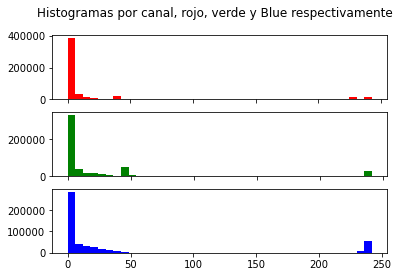

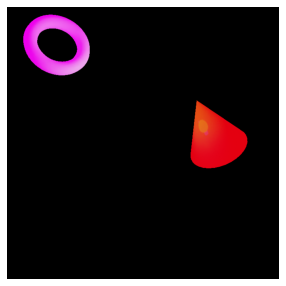

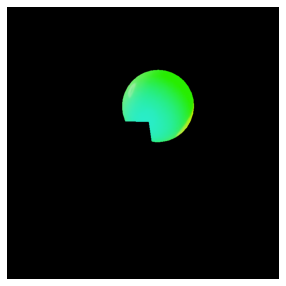

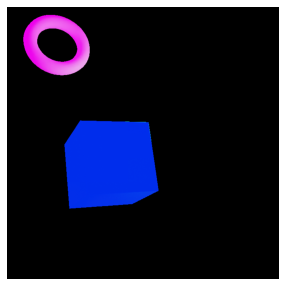

In [9]:
# RESPUESTA PROBLEMA 1.b

# 1. leer la imagen (RGB)
img = cv2.imread('tarea_01//shapes.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 2. seleccionar canales de la imagen
R = img[:,:,0]
G = img[:,:,1]
B = img[:,:,2]

# 3. plotear histogramas de los canales
fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.suptitle('Histogramas por canal, rojo, verde y Blue respectivamente')

hist = R.flatten() 
#plt.figure()
ax1.hist(hist,40,color='r')
#plt.title('Canal RED')

hist = G.flatten() 
#plt.figure()
ax2.hist(hist,40,color='g')
#plt.title('Canal GREEN')

hist = B.flatten() 
#plt.figure()
ax3.hist(hist,40,color='b')
#plt.title('Canal BLUE')

for ax in fig.get_axes():
    ax.label_outer()

# 4. crear máscaras binaria a partir de los umbrales de los histogramas
mask_R = cv2.inRange(R, 220 , 255)/255
mask_G = cv2.inRange(G, 230 , 255)/255
mask_B = cv2.inRange(B, 230 , 255)/255

# 5. multiplicar imagen original con máscaras finales y visualizar
mask_img_R = np.zeros_like(img)

for i in range(mask_img_R.shape[2]):
    mask_img_R[:,:,i] = np.multiply(img[:,:,i], mask_R)

plt.figure(figsize=(5, 5))
plt.imshow(mask_img_R)
plt.axis("off")

mask_img_G = np.zeros_like(img)

for i in range(mask_img_G .shape[2]):
    mask_img_G [:,:,i] = np.multiply(img[:,:,i], mask_G )

plt.figure(figsize=(5, 5))
plt.imshow(mask_img_G )
plt.axis("off")

mask_img_B  = np.zeros_like(img)

for i in range(mask_img_B.shape[2]):
    mask_img_B[:,:,i] = np.multiply(img[:,:,i], mask_B)

plt.figure(figsize=(5, 5))
plt.imshow(mask_img_B)
plt.axis("off")


c) Suponga que ahora quiere segmentar la dona de color rosado. Encuentre una manera de aislar la zona de interés.

`Nota: Puede usar el color-space HSV o RGB.`


<img src="https://raw.githubusercontent.com/gasparzilla/roboticafcfm/master/tarea_01/images/imagenes_P1/P1A4.png" height="250">

(-0.5, 719.5, 719.5, -0.5)

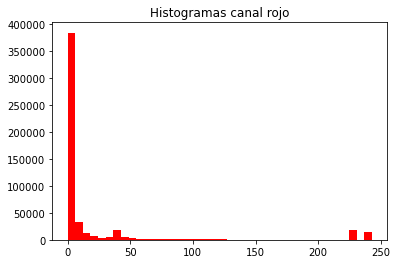

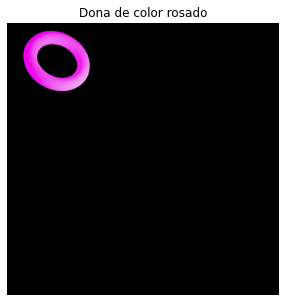

In [10]:
# RESPUESTA PROBLEMA 1.c
'''
  Idea de resolución-> usar el canal rojo, e hilar fino sobre el umbral de la mascara 
  Si se observa el histograma de este color, es posible identificar 2 zonas bien diferenciadas
  Zona 1: de 220, 230 -> permite rescatar el cono rojo   
  Zona 2: de 235, 255-> permite rescatar la dona de color rosado
'''
img = cv2.imread('tarea_01//shapes.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 2. seleccionar canales de la imagen
R = img[:,:,0]

# 3. plotear histogramas de los canales
plt.figure()
plt.title('Histogramas canal rojo')
hist = R.flatten() 
plt.hist(hist,40,color='r')

mask_R = cv2.inRange(R, 235 , 255)/255

mask_img_R = np.zeros_like(img)

for i in range(mask_img_R.shape[2]):
    mask_img_R[:,:,i] = np.multiply(img[:,:,i], mask_R)

plt.figure(figsize=(5, 5))
plt.title('Dona de color rosado')
plt.imshow(mask_img_R)
plt.axis("off")


# Problema 2: Applying Numerical Functions

Parte importante en el procesamiento de imágenes digitales es la aplicación de transformaciones (lineales y no-lineales) sobre los valores numéricos de estas. Para introducir esta idea, considere el siguiente problema sobre la imagen en escala de grises `old.jpg`.

(-0.5, 224.5, 224.5, -0.5)

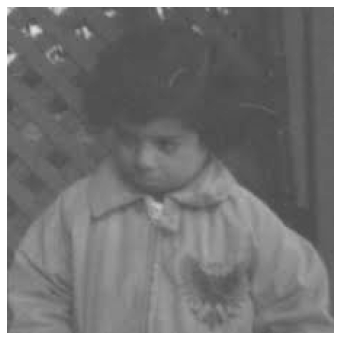

In [11]:
# leer imagen
img = cv2.imread('tarea_01//old.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# mostrar imagen
fig = plt.figure(figsize=(6, 6))
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')


Como se puede observar, esta imagen posee un muy bajo contraste, donde claramente los valores de los pixeles no utilizan todo el rango de intensidades `[0, 255]` disponible. Para corregir esto, se puede aplicar una transformación lineal punto a punto.

<img src="https://raw.githubusercontent.com/cherrerab/roboticafcfm/master/tarea_01/bin/prob_04.png" height="250">

(a) Analice el histograma de la imagen y determine el rango de intensidades contenido en esta (obtenga los valores `min` y `max` correspondientes). Luego, considerando estos límites (`v_min` y `v_max`), aplique la transformación `scaling`:

`new_px = 255*(px - v_min)/(v_max - v_min)`

sobre cada uno de los pixeles en la imagen y visualice el resultado. Esta función `scaling` simplemente escala los valores de los pixeles tal que el mínimo y el máximo correspondan a 0 y 255, respectivamente.

**Al operar numéricamente los valores de una imagen `np.uint8`, suele convenir transformar esta a valores punto flotante `np.float32`.

(-0.5, 224.5, 224.5, -0.5)

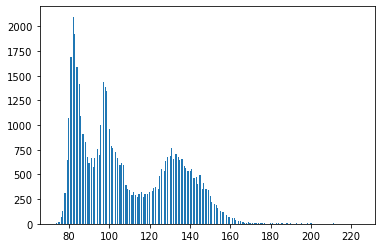

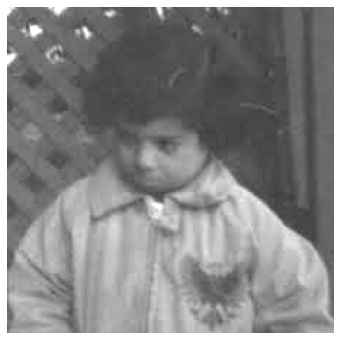

In [12]:
# RESPUESTA PROBLEMA 2.a

# ---
# leer imagen
img = cv2.imread('tarea_01//old.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# transformar imagen a np.float32
img = img.astype(np.float32)

# ---
# plotear histograma de la imagen
hist = img.flatten()
plt.figure()
plt.hist(hist,255)

# defina valores v_min y v_max (puede utilizar np.min y np.max si lo prefiere)
v_min = 40
v_max = 180

# ---
# transformar imagen
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        #new_px = 255*(px - v_min)/(v_max - v_min)
        # aplicar transformación
        img[i, j] = 255*(img[i, j]-v_min)/(v_max-v_min)
        if img[i, j] > 255: #este if permite normalizar los valores que exceden el rango
            img[i, j] = 255
        if img[i, j] < 0:
            img[i, j] = 0

# transformar imagen a np.uint8
img = img.astype(np.uint8)

# mostrar imagen
fig = plt.figure(figsize=(6, 6))
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

(b) Siguiendo el mismo procedimiento, normalice los valores de intensidad de la imagen entre `[0, 1]` y luego aplique la transformación:

`new_px = log( px + alpha )`

sobre la imagen. Puede que sea necesario aplicar un último `scaling` al rango `[0, 255]` posterior a la transformación.

Responda: ¿Cuales son los efectos de esta operación? ¿Por qué se necesita el parámetro  `alpha` y como afecta este los resultados? ¿Cual es
un valor adecuado para `alpha`?




(-0.5, 224.5, 224.5, -0.5)

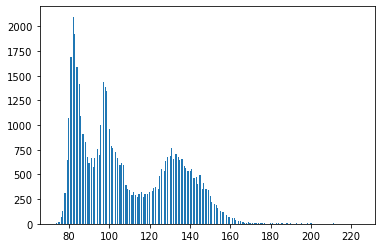

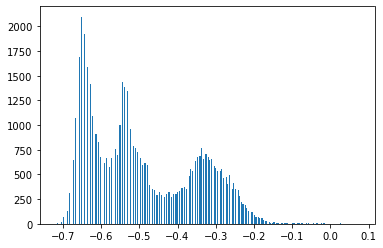

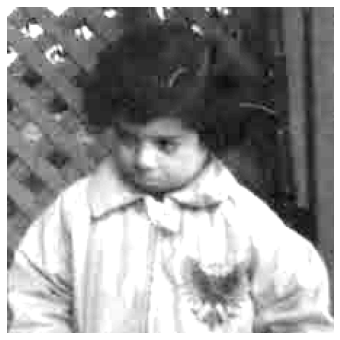

In [58]:
# RESPUESTA PROBLEMA 2.b

# leer imagen
img = cv2.imread('tarea_01//old.jpg')

height, width, _ = img.shape
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


# transformar imagen a np.float32
img = img.astype(np.float32)

# plotear histograma de la imagen
hist = img.flatten()
plt.figure()
plt.hist(hist,255)

# ---
# normalizar imagen (scaling entre 0 y 1)
v_min = 0
v_max = 1

for i in range(height):
    for j in range(width):
        #img[i, j] = 255*(img[i, j]-v_min)/(v_max-v_min)
        img[i, j] = img[i, j]/255
        if img[i,j] > 1:
            img[i,j] = 1
#print(img)

# ---
# transformar imagen
alpha = 0.05

for i in range(height):
    for j in range(width):
    #new_px = log( px + alpha )
        img[i, j] = np.log(img[i, j]+alpha)


# plotear histograma de la imagen transformada
plt.figure()
plt.hist(img.flatten(), 255)


# ---
# escalar imagen (scaling entre 0 y 255)
#estos valores de v_min y v_max es posible determinarlos a partir del histograma
v_min = -1.2
v_max = -0.3

for i in range(height):
    for j in range(width):
        img[i, j] = 255*(img[i, j]-v_min)/(v_max-v_min)
        if img[i, j] > 255: #este if permite normalizar los valores que exceden el rango
            img[i, j] = 255
        if img[i, j] < 0:
            img[i, j] = 0
    
# transformar imagen a np.uint8
img = img.astype(np.uint8)

# mostrar imagen
fig = plt.figure(figsize=(6, 6))
plt.imshow(img, cmap='gray')
plt.axis('off')

#### Responda: ¿Cuales son los efectos de esta operación? ¿Por qué se necesita el parámetro  alpha y como afecta este los resultados? ¿Cual es un valor adecuado para alpha?
* Esta operación genera una imagen con mayorn contraste.
* Agregar el parametro alga es necesario para evitar que el logaritmo se indetermine, (lo cual ocurre cuando cuando tenemos log(0) ), y como es un valor muy pequeño permite tener una gran diferencia entre el valor minimo y el máximo permitiendo un mayor contraste.
* Un valor adecuado para alpha varia dependiendo de lo que busquemos con la imagen, pero para obtener un buen contraste alpha debe ser menor a 0.1, por lo que en el caso de la tarea, alpha de 0.05 es un valor adecuado.

c) Otro tipo de operaciones comunes corresponden a los cambios de tamaño de imagenes, donde se utilizan distintos de algoritmos de interpolación para calcular el valor de los pixeles de la nueva imagen con dimensiones distintas.

Uno de los algoritmos más simples para realizar esto es el "**Nearest Neighbor Interpolation**", donde a los nuevos pixeles generados se les entrega el valor correspondiente al existente en sus vecinos más cercanos:

<img src="https://1.bp.blogspot.com/-Fkf3JtsLFJ4/WgLV4PrG8PI/AAAAAAAABz8/yEglVQ3S2qQRzx-q5AKjGDmVkzFLZqEBACLcBGAs/s640/Nearest1.png" height="300">

Genere un algoritmo simple que sea capaz de aumentar las dimensiones de altura y ancho de la imagen (de manera proporcional, utilizar un factor de escala entero mayor a 1), y compare la imagen original respecto a la generada mediante este algoritmo.

<img src="https://raw.githubusercontent.com/gasparzilla/roboticafcfm/master/tarea_01/images/DOUBLE_EX.png" height="300">

### Responda: ¿Que sucede cuando se agranda demasiado la imagen? ¿Porque sucede esto?

* Al agrandar demasiado la imagen, se pierde la "calidad" de esta, es decir, se dejan de apreciar los detalles y la imagen pierde la forma.

La imagen original tiene dimensiones:  (225, 225, 3)
La nueva imagen tiene dimensiones:  (450, 450, 3)


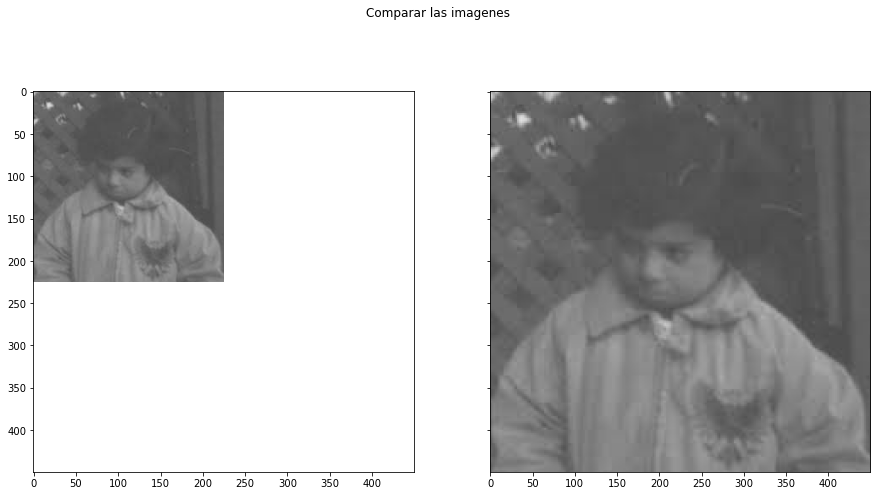

In [53]:
# RESPUESTA PROBLEMA 2.c

# 1. leer la imagen (RGB)
img = cv2.imread('tarea_01//old.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 2. extraer información de sus dimensiones
print('La imagen original tiene dimensiones: ', img.shape )
#(225, 225, 3) -> (450,450,3)

# 3. generar nueva imagen inicializada en 0, con las dimensiones al doble
n= 2 #-> parametro que nos permite variar que tanto se agranda la imagen

nimg = np.zeros([n*225,n*225,3],dtype=np.uint8)
print('La nueva imagen tiene dimensiones: ', nimg.shape )
# 4. para cada pixel en la nueva imagen, asignar el valor correspondiente a su posición y canal (hint: usar función int())
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        ni,nj=n*i,n*j
        nimg[ni,nj]    = img[i,j]
        nimg[ni,nj+1]  = img[i,j]
        nimg[ni+1,nj]  = img[i,j]
        nimg[ni+1,nj+1]= img[i,j]

# 5. comparar las imagenes (hint: utilizar plt.subplots())
fig, (ax1, ax2) = plt.subplots(1,2,sharex=True,sharey=True,figsize=(15, 8))
fig.suptitle('Comparar las imagenes')

ax1.imshow(img, cmap='gray')
ax2.imshow(nimg, cmap='gray')

# Problema 3: Coin Classification

Considere la imagen de monedas `coins.png`. Se desea elaborar un algoritmo que permita clasificar cada una de las monedas de acuerdo a su tamaño.

<img src="https://raw.githubusercontent.com/cherrerab/roboticafcfm/master/tarea_01/bin/prob_05.png" height="250">

En el Problema 1 de esta tarea ya se vio como es posible segmentar los cuerpos de una imagen mediante la binarización adecuada de esta.

(-0.5, 216.5, 176.5, -0.5)

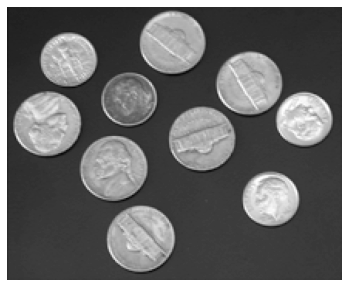

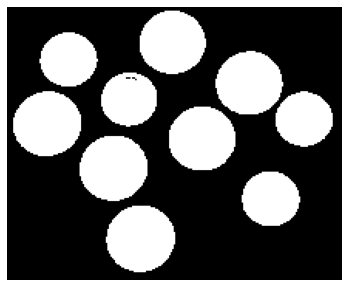

In [113]:
# leer imagen
img = cv2.imread('tarea_01//coins.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# convertir a escala de grises
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

fig = plt.figure(figsize=(6, 6))
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

# binarizar con cv2.inRange (los valores de la máscara deben estar entre 0 y 1)
mask = cv2.inRange(img_gray, 90, 255)
mask = mask/255

fig = plt.figure(figsize=(6, 6))
plt.imshow(mask, cmap='gray')
plt.axis('off')

No obstante, esto no permite aislar cada una de las monedas por si sola ya que estas son relativamente del mismo color (o más bien, tonalidad de gris). Para resolver esto, se puede utilizar el algoritmo `Connected Componentes` (implementado en `cv2.connectedComponents`) el cual, a partir de una imagen binarizada etiqueta cada uno de los cuerpos presentes. Esto último permite acceder a cada uno de los cuerpos mediante su etiqueta o bien, índice.

<img src="https://raw.githubusercontent.com/cherrerab/roboticafcfm/master/tarea_01/bin/prob_06.png" height="250">

monedas identificadas: 10


(-0.5, 216.5, 176.5, -0.5)

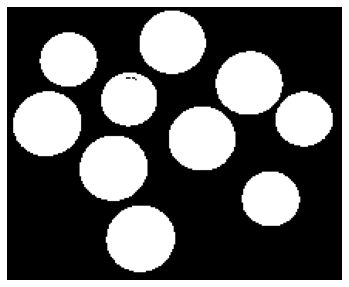

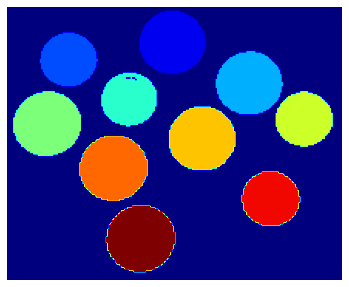

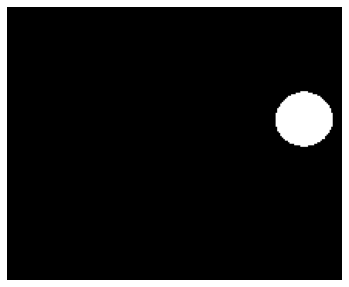

In [42]:
# ---
# leer imagen
img = cv2.imread('tarea_01//coins.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# convertir a escala de grises
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# binarizar con cv2.inRange (los valores de la máscara deben estar entre 0 y 1)
mask = cv2.inRange(img_gray, 90, 255)/255
mask = np.uint8(mask)

fig = plt.figure(figsize=(6, 6))
plt.imshow(mask, cmap='gray')
plt.axis('off')

# ---
# etiquetar mediante connected components
# retorna cantidad de cuerpos identificados y una imagen con las etiquetas
num_coins, labels = cv2.connectedComponents(mask)

print('monedas identificadas: {:d}'.format((num_coins - 1)))

fig = plt.figure(figsize=(6, 6))
plt.imshow(labels, cmap='jet')
plt.axis('off')

# obtener mask de moneda con etiqueta 6
coin_6 = np.uint8( labels==6 )

fig = plt.figure(figsize=(6, 6))
plt.imshow(coin_6, cmap='gray')
plt.axis('off')


(a) Utilizando un `for loop` itere sobre los índices de las monedas y clasifiquelas a partir de su tamaño (note que puede hacer esto a partir de su área o cantidad de piexeles), genere una imagen binaria con las monedas grandes y otra con las monedas pequeñas.

<img src="https://raw.githubusercontent.com/cherrerab/roboticafcfm/master/tarea_01/bin/prob_07.png" height="250">

(-0.5, 216.5, 176.5, -0.5)

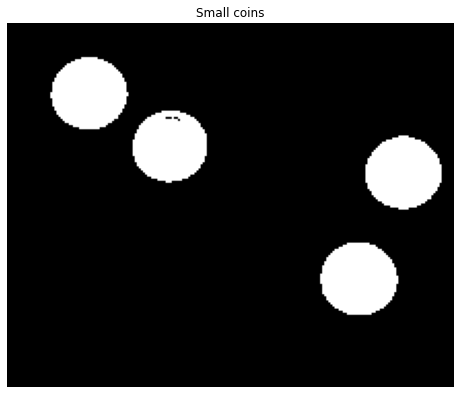

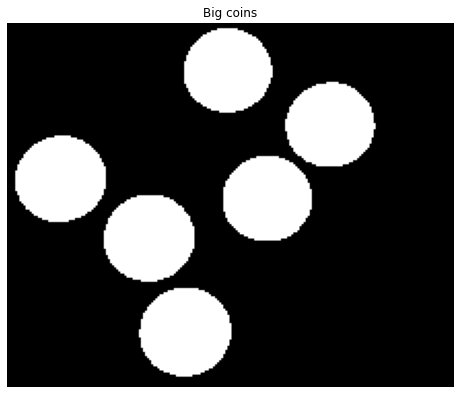

In [130]:
# RESPUESTA PROBLEMA 3.a

# leer imagen
img = cv2.imread('tarea_01//coins.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# convertir a escala de grises
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# binarizar con cv2.inRange (los valores de la máscara deben estar entre 0 y 1)
mask = cv2.inRange(img_gray, 90, 255)/255
mask = np.uint8(mask)

# etiquetar mediante connected components
num_coins, labels = cv2.connectedComponents(mask)

#labels es una matriz

# inicializar imágenes de monedas pequeñas y grandes
small_coins = np.zeros_like(mask)
big_coins = np.zeros_like(mask)

# para cada una de las etiquetas identificadas
for i in np.arange(num_coins):
    coin = np.uint8(labels==i+1)
    #print(coin)
    # si el área de la moneada coin_i corresponde a moneda pequeña
    if coin.sum() <=1300:
        # agregar mask a small_coins (sume las imágenes)
        small_coins += coin
    else:
        big_coins += coin
        # agregar mask a big_coins (sume las imágenes)

# ---
# visualizar resultados
fig = plt.figure(figsize=(8, 8))
plt.title("Small coins")
plt.imshow(small_coins, cmap='gray')
plt.axis('off')

fig = plt.figure(figsize=(8, 8))
plt.title("Big coins")
plt.imshow(big_coins, cmap='gray')
plt.axis('off')